# Communities and crime - violent crime rate prediction
PRO1D Final Project
s27369
## 0. Get the data

In [1]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd

dec_att = 'violentCrimesPerPop'

communities_and_crime = fetch_ucirepo(id=183)
df = pd.concat([communities_and_crime.data.features, communities_and_crime.data.targets], axis=1)
df

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05          ?              ?                    ?   
1990     0.37            0.20          ?              ?                    ?   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1989                    ?                 0.00                ?   
1990                    ?                 0.00                ?   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

### Initial analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [3]:
df.describe()

state         fold   population  householdsize  racepctblack  \
count  1994.000000  1994.000000  1994.000000    1994.000000   1994.000000   
mean     28.683551     5.493982     0.057593       0.463395      0.179629   
std      16.397553     2.873694     0.126906       0.163717      0.253442   
min       1.000000     1.000000     0.000000       0.000000      0.000000   
25%      12.000000     3.000000     0.010000       0.350000      0.020000   
50%      34.000000     5.000000     0.020000       0.440000      0.060000   
75%      42.000000     8.000000     0.050000       0.540000      0.230000   
max      56.000000    10.000000     1.000000       1.000000      1.000000   

       racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
count   1994.000000   1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean       0.753716      0.153681     0.144022     0.424218     0.493867  ...   
std        0.244039      0.208877     0.232492     0.155196     0.143564  ...   
min        0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%        0.630000      0.040000     0.010000     0.340000     0.410000  ...   
50%        0.850000      0.070000     0.040000     0.400000     0.480000  ...   
75%        0.940000      0.170000     0.160000     0.470000     0.540000  ...   
max        1.000000      1.000000     1.000000     1.000000     1.000000  ...   

       PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
count     1994.000000       1994.000000     1994.000000    1994.000000   
mean         0.215552          0.608892        0.535050       0.626424   
std          0.231134          0.204329        0.181352       0.200521   
min          0.000000          0.000000        0.000000       0.000000   
25%          0.060000          0.470000        0.420000       0.520000   
50%          0.130000          0.630000        0.540000       0.670000   
75%          0.280000          0.777500        0.660000       0.770000   
max          1.000000          1.000000        1.000000       1.000000   

       PctSameState85     LandArea      PopDens  PctUsePubTrans  \
count     1994.000000  1994.000000  1994.000000     1994.000000   
mean         0.651530     0.065231     0.232854        0.161685   
std          0.198221     0.109459     0.203092        0.229055   
min          0.000000     0.000000     0.000000        0.000000   
25%          0.560000     0.020000     0.100000        0.020000   
50%          0.700000     0.040000     0.170000        0.070000   
75%          0.790000     0.070000     0.280000        0.190000   
max          1.000000     1.000000     1.000000        1.000000   

       LemasPctOfficDrugUn  ViolentCrimesPerPop  
count          1994.000000          1994.000000  
mean              0.094052             0.237979  
std               0.240328             0.232985  
min               0.000000             0.000000  
25%               0.000000             0.070000  
50%               0.000000             0.150000  
75%               0.000000             0.330000  
max               1.000000             1.000000  

[8 rows x 102 columns]

## 1. Data Preprocessing
### 1.1 Consistent column names

In [4]:
def camelCase(word: str) -> str:
    return word[0].lower()+word[1:]

df.columns = list(map(camelCase, df.columns))
df.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'landArea', 'popDens', 'pctUsePubTrans', 'policCars', 'policOperBudg',
       'lemasPctPolicOnPatr', 'lemasGangUnitDeploy', 'lemasPctOfficDrugUn',
       'policBudgPerPop', 'violentCrimesPerPop'],
      dtype='object', length=128)

### 1.2 Drop non predictive columns

In [5]:
df.drop(columns=['fold', 'state', 'county', 'community', 'communityname', ], inplace=True)

### 1.3 Missing values

In [6]:
df.columns[df.isnull().any()]

Index([], dtype='object')

It appears that there's no missing values. Let's inspect the dataset further.

In [7]:
df['lemasSwFTFieldOps'].value_counts().sort_values(ascending=False)

lemasSwFTFieldOps
?       1675
0.98      81
0.97      79
0.96      35
0.95      26
0.93      12
0.94      11
0.92      10
0.91       7
0.87       6
0.85       5
0.99       5
0.83       4
0          4
0.86       3
0.89       3
0.9        3
0.75       2
0.82       2
0.63       2
0.81       2
0.67       2
0.8        2
0.84       2
0.53       1
0.49       1
0.64       1
0.37       1
0.61       1
0.72       1
0.55       1
1          1
0.88       1
0.73       1
0.76       1
Name: count, dtype: int64

Turns out empty values are marked as '?' symbol. Let's change that to np.nan

In [8]:
import numpy as np
df.replace('?', np.nan, inplace=True)

In [9]:
print(df.isnull().sum().sort_values(ascending=False).value_counts())

0       100
1675     22
1         1
Name: count, dtype: int64


Looks like there's 22 columns that are more than half empty, and one with a single missing value. Let's visualize them

<Axes: >

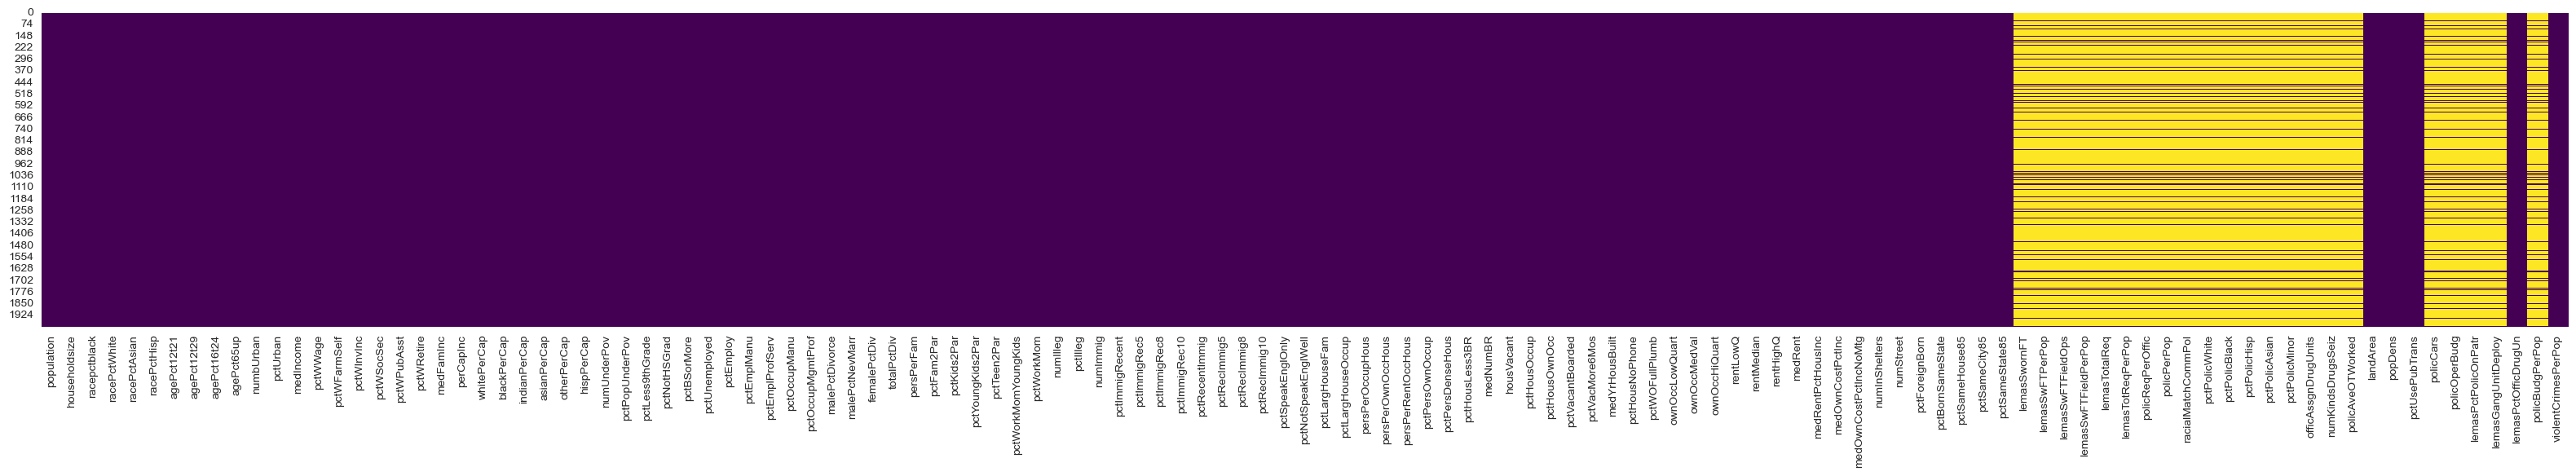

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Let's get these columns' names

In [11]:
columns_with_nan = df.columns[df.isnull().sum() > 1000]
columns_with_nan

Index(['lemasSwornFT', 'lemasSwFTPerPop', 'lemasSwFTFieldOps',
       'lemasSwFTFieldPerPop', 'lemasTotalReq', 'lemasTotReqPerPop',
       'policReqPerOffic', 'policPerPop', 'racialMatchCommPol',
       'pctPolicWhite', 'pctPolicBlack', 'pctPolicHisp', 'pctPolicAsian',
       'pctPolicMinor', 'officAssgnDrugUnits', 'numKindsDrugsSeiz',
       'policAveOTWorked', 'policCars', 'policOperBudg', 'lemasPctPolicOnPatr',
       'lemasGangUnitDeploy', 'policBudgPerPop'],
      dtype='object')

Due to large number of missing values, mean/median imputing techniques would not be effective.
The only solution is to delete them.

In [12]:
df.drop(columns=columns_with_nan, inplace=True)

Now let's take a look at the column with 1 missing value

In [13]:
df.isnull().sum().sort_values(ascending=False)[:1]

otherPerCap    1
dtype: int64

In [14]:
df["otherPerCap"].describe()

count     1993
unique      97
top          0
freq       129
Name: otherPerCap, dtype: object

Since it's just 1 numerical value missing, let's impute mean value

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['otherPerCap'] = imputer.fit_transform(df[['otherPerCap']])
df["otherPerCap"].isna().sum()

0

In [16]:
df.columns[df.isnull().any()]

Index([], dtype='object')

Missing values successfully dealt with

## 2. Exploratory data analysis
### 2.1 Correlation matrix
#### 2.1.1 Entire dataset

In [17]:
correlation_matrix = df.corr()
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

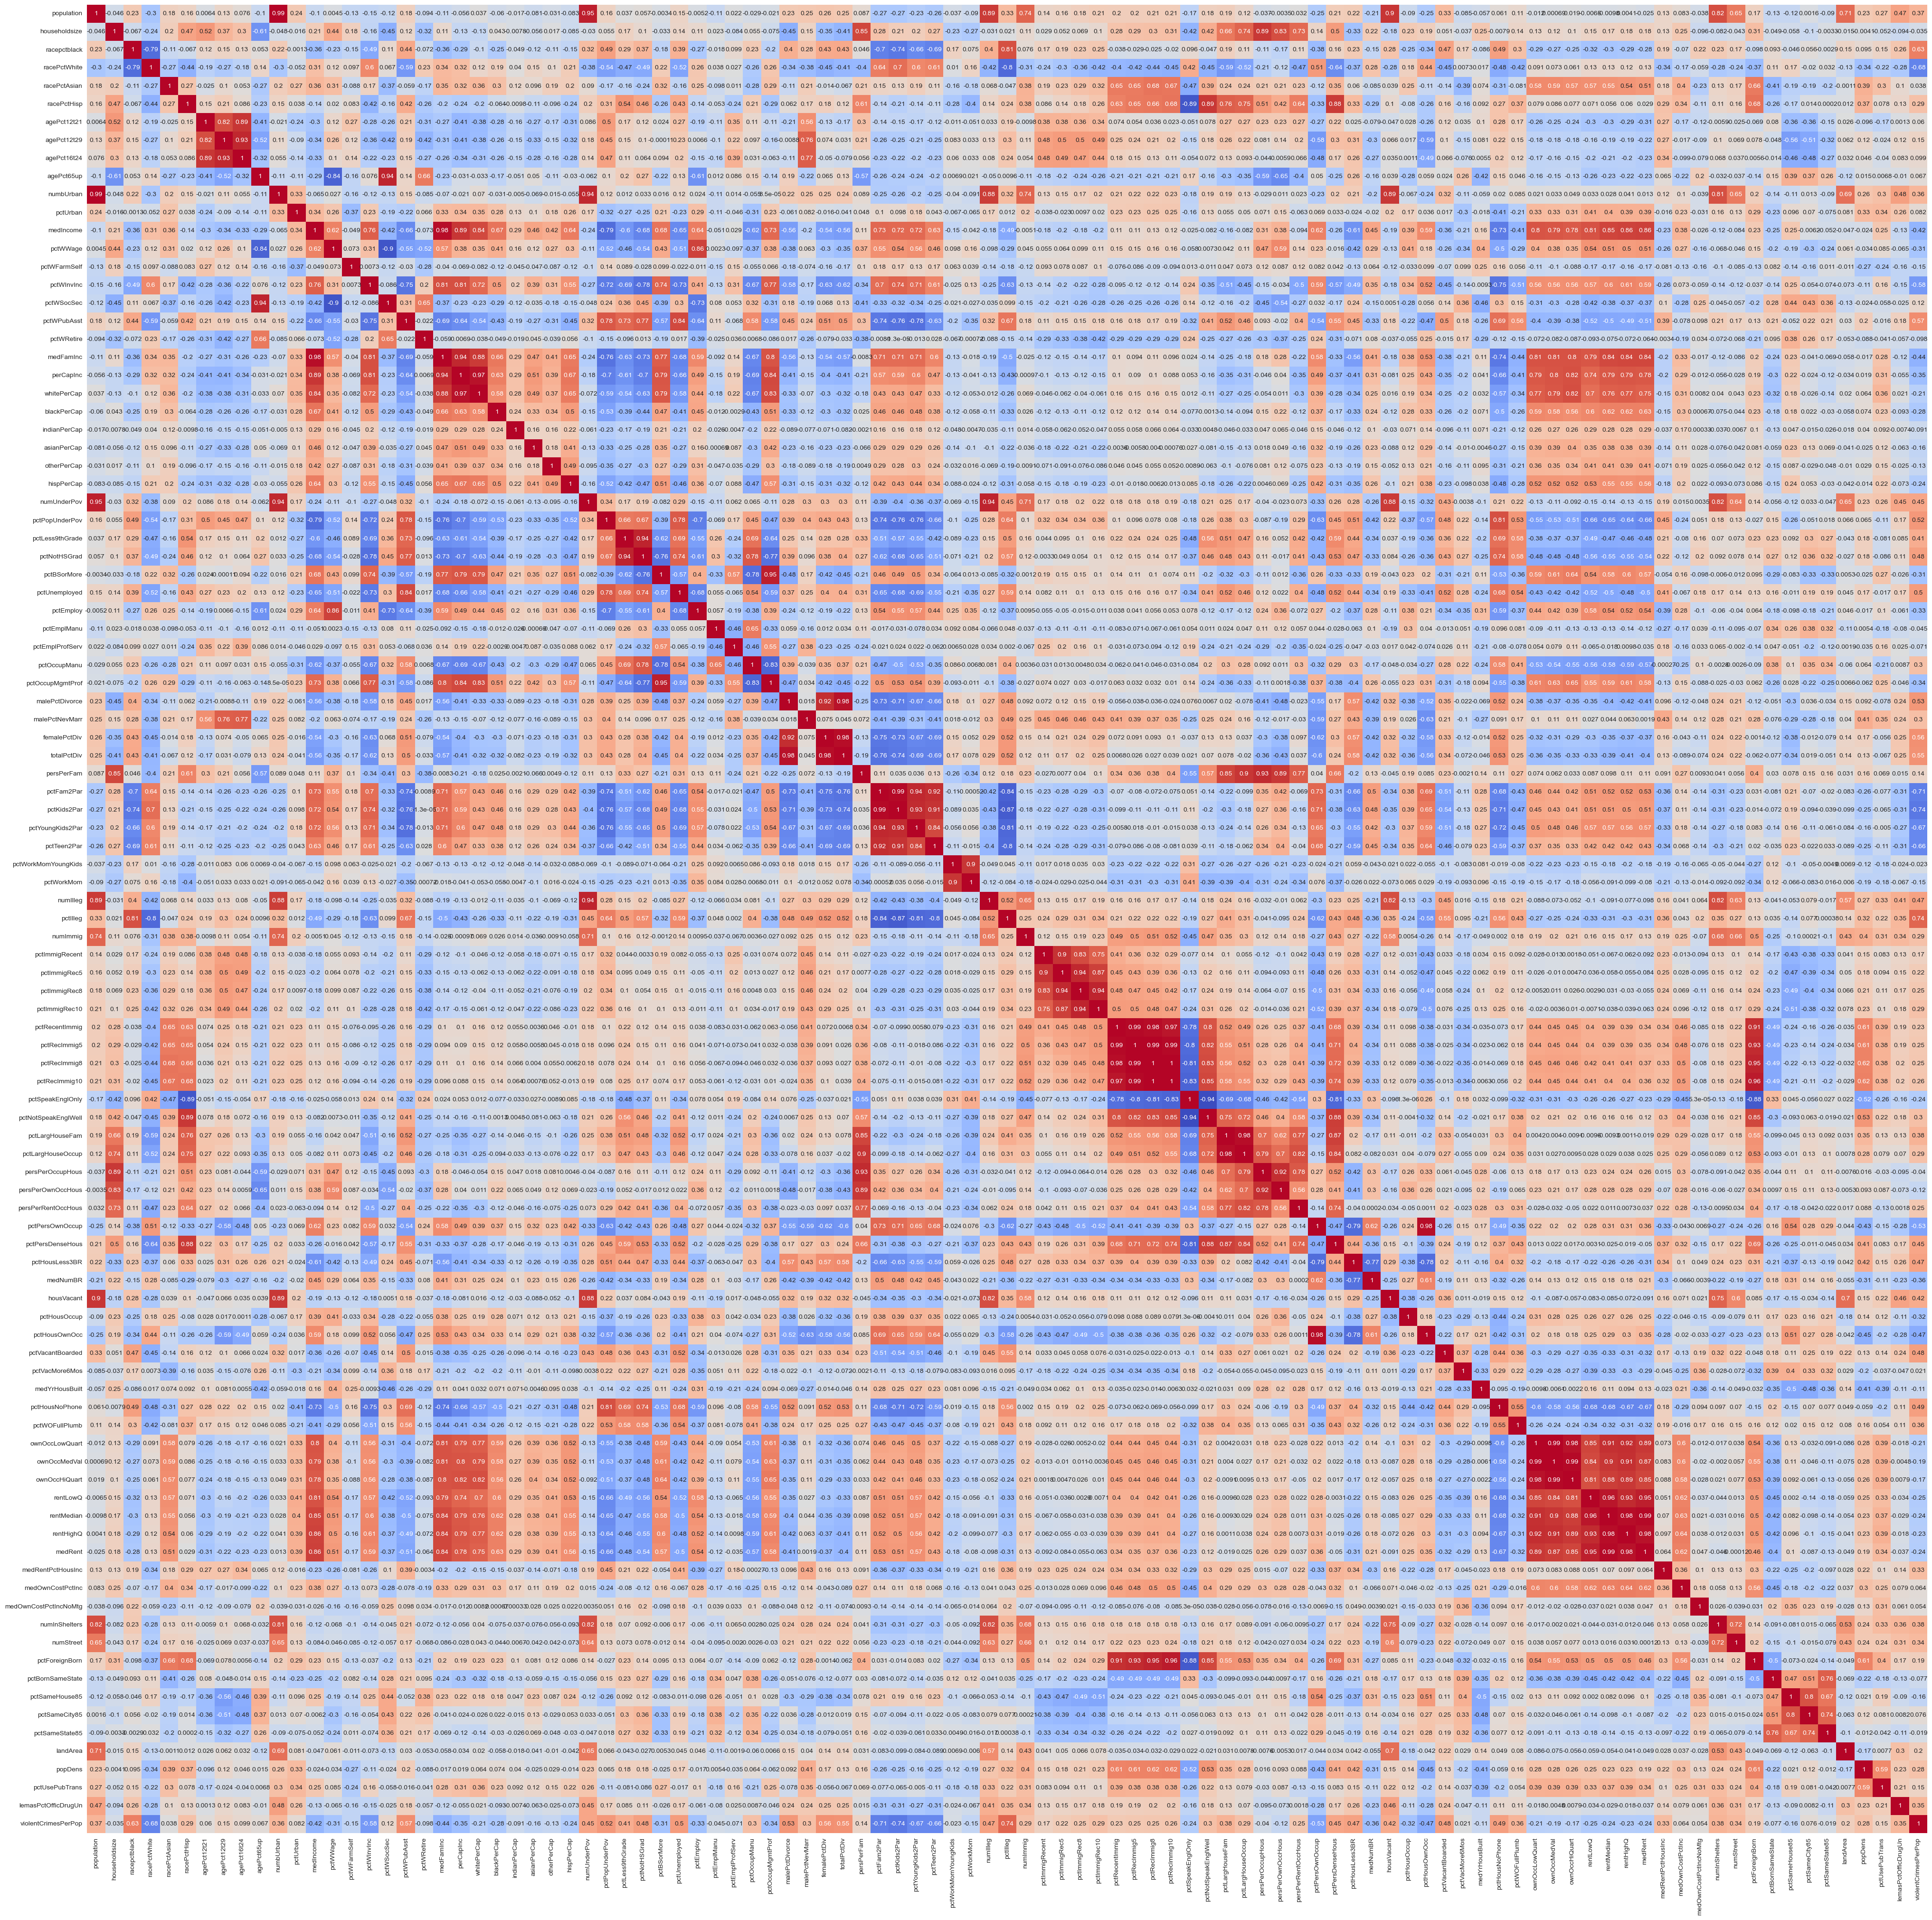

In [18]:
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.show()

### 2.1.2 Decision attribute correlation
Now let's check how corelated columns are to the decision attribute.

In [19]:
decision_corr = df.corr()["violentCrimesPerPop"].sort_values(ascending=False)
decision_corr = decision_corr.to_frame()
decision_corr

violentCrimesPerPop
violentCrimesPerPop             1.000000
pctIlleg                        0.737957
racepctblack                    0.631264
pctWPubAsst                     0.574665
femalePctDiv                    0.556032
...                                  ...
pctTeen2Par                    -0.661582
pctYoungKids2Par               -0.666059
racePctWhite                   -0.684770
pctFam2Par                     -0.706667
pctKids2Par                    -0.738424

[101 rows x 1 columns]

<Axes: >

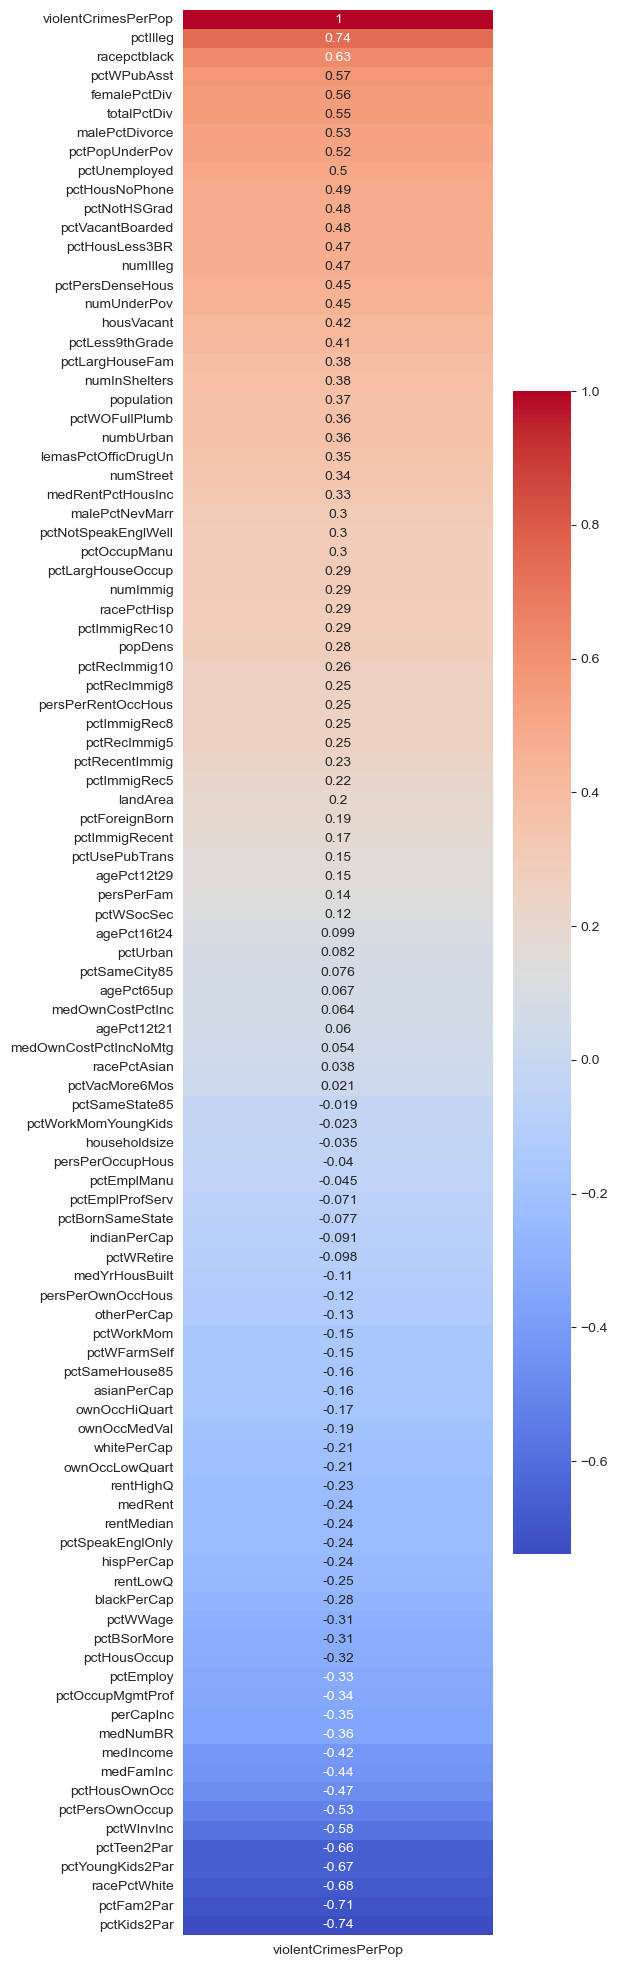

In [20]:
plt.figure(figsize=(5,25))
sns.heatmap(decision_corr, annot=True, cmap='coolwarm')

## 3. Feature selection
In order to improve performance by reducing noise and improve computation time, i'll perform feature selection
### Importance
First approach to feature selection is using RandomForestRegressor to determine feature importance and then using this metric to perform get different importance threshold datasets

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
#sort
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

def get_importance_threshold_dataset(sorted_feature_importance_df, threshold):
    cumulative_importance = np.cumsum(sorted_feature_importance_df['Importance'])
    #Find the number of features needed to reach 90% importance
    num_features = np.argmax(cumulative_importance >= threshold) + 1

    pairs = zip(sorted_feature_importance_df['Feature'], sorted_feature_importance_df["Importance"])
    lowest_acceptable_importance = sorted_feature_importance_df["Importance"][::-1][num_features - 1]
    important_features = [f for f, imp in pairs if imp >= lowest_acceptable_importance]
    X_filtered = X[important_features]
    # print(f"Before: {sorted_feature_importance_df.shape[0]}; after: {X_filtered.shape[1]};")
    return X_filtered

### PCA
Another approach is using Principal Component Analysis. It helps reduce dimensionality, improves model performance, speeds up computation while handling multicollinearity well.

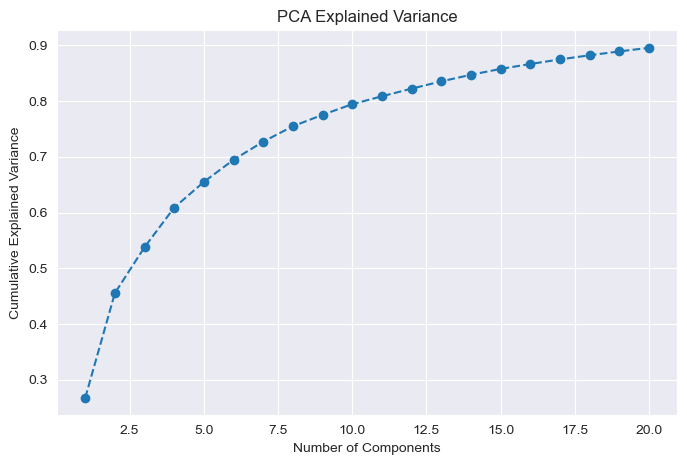

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

### Get processed datasets

In [24]:
datasets = {}
datasets["100%_importance"] = X
for threshold in range (90, 19, -10):
    datasets[f"{threshold:03d}%_importance"] = get_importance_threshold_dataset(feature_importance_df, threshold/100)

for n in range(10, 41, 10):
    pca = PCA(n_components=n)
    datasets[f'{n}_compPCA'] = pca.fit_transform(X)

def print_datasets(datasets):
    for k,v in datasets.items():
        print(k, v.shape)
print_datasets(datasets)

100%_importance (1994, 100)
090%_importance (1994, 92)
080%_importance (1994, 85)
070%_importance (1994, 25)
060%_importance (1994, 3)
050%_importance (1994, 69)
040%_importance (1994, 69)
030%_importance (1994, 74)
020%_importance (1994, 74)
10_compPCA (1994, 10)
20_compPCA (1994, 20)
30_compPCA (1994, 30)
40_compPCA (1994, 40)


### Train test split
in order to prevent data leakage i need to perform train test split before proceeding

In [25]:
from sklearn.model_selection import train_test_split
#to prevent data leakage
splits = {}
for dataset_name, dataset in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, random_state=42)
    splits[dataset_name] = {"X_train": X_train, "X_test":X_test, "y_train": y_train, "y_test":y_test}
for k, v in splits.items():
    print(k)
    print_datasets(v)
    print()

100%_importance
X_train (1495, 100)
X_test (499, 100)
y_train (1495,)
y_test (499,)

090%_importance
X_train (1495, 92)
X_test (499, 92)
y_train (1495,)
y_test (499,)

080%_importance
X_train (1495, 85)
X_test (499, 85)
y_train (1495,)
y_test (499,)

070%_importance
X_train (1495, 25)
X_test (499, 25)
y_train (1495,)
y_test (499,)

060%_importance
X_train (1495, 3)
X_test (499, 3)
y_train (1495,)
y_test (499,)

050%_importance
X_train (1495, 69)
X_test (499, 69)
y_train (1495,)
y_test (499,)

040%_importance
X_train (1495, 69)
X_test (499, 69)
y_train (1495,)
y_test (499,)

030%_importance
X_train (1495, 74)
X_test (499, 74)
y_train (1495,)
y_test (499,)

020%_importance
X_train (1495, 74)
X_test (499, 74)
y_train (1495,)
y_test (499,)

10_compPCA
X_train (1495, 10)
X_test (499, 10)
y_train (1495,)
y_test (499,)

20_compPCA
X_train (1495, 20)
X_test (499, 20)
y_train (1495,)
y_test (499,)

30_compPCA
X_train (1495, 30)
X_test (499, 30)
y_train (1495,)
y_test (499,)

40_compPCA
X_train 

## 4. Models
For each dataset i want to test different models:
- Linear:
  - LinearRegression
  - BayesianRidge
- Non-linear:
  - MLPR (Neural networks)
  - KNeighborsRegressor
- Tree based:
  - RandomForestRegressor
  - xgboost


In [26]:
results = {
    "model_name":[],
    "mae":[],
    "mse":[],
    "r2":[],
    "time":[]
}
models = {}

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_model(model, dataset_name:str, t, suffix=None):#suffix only used in df naming
    pred = model.predict(splits[dataset_name]['X_test'])
    mae = mean_absolute_error(splits[dataset_name]['y_test'], pred)
    mse = mean_squared_error(splits[dataset_name]['y_test'], pred)
    r2 = r2_score(splits[dataset_name]['y_test'], pred)

    results["model_name"].append(f'{dataset_name}{suffix if suffix else ""}')
    results["mae"].append(mae)
    results["mse"].append(mse)
    results["r2"].append(r2)
    results["time"].append(t)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
def fit_and_eval(model, dataset_name:str, suffix=None):#suffix only used in df naming
    start = time.time()
    model.fit(splits[dataset_name]['X_train'], splits[dataset_name]['y_train'])
    t = time.time()-start
    eval_model(model, dataset_name, t, suffix)

Now let's train and evaluate the models. For MLPR and xgboost i used RandomizedSearchCV to find the best params for each dataset.

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tqdm import tqdm
from scipy.stats import uniform

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
param_dist = {
    "hidden_layer_sizes": [(128, 64, 32), (256, 128, 64), (100, 50), (200, 100, 50)],  # Different layer configurations
    "alpha": uniform(0.0001, 0.01),  # L2 regularization (small range to avoid underfitting)
    "learning_rate": ["constant", "adaptive"],  # Adaptive adjusts learning rate dynamically
    "max_iter": [1000, 2000, 3000],  # Allow sufficient iterations
    "batch_size": [16, 32, 64],  # Mini-batch sizes
}

suffixes = {'xgb':"_xgb",'linreg':"_LinReg","rf":"_rf", "knn":"_KNN", 'bayes':"_Bayes", "mlpr":"_MLPR"}

for dataset_name, spl in tqdm(splits.items()):
    #XGB
    print(f"{dataset_name}...")
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    search = RandomizedSearchCV(
        model, param_distributions=param_grid,
        n_iter=20, scoring='neg_root_mean_squared_error',
        cv=5, verbose=1, n_jobs=-1, random_state=42
    )
    search.fit(spl["X_train"], spl["y_train"])
    models[f'{dataset_name}{suffixes['xgb']}'] = search.best_estimator_ #returns xgb with best params for particular dataset
    fit_and_eval(models[f'{dataset_name}{suffixes['xgb']}'], dataset_name, suffixes['xgb'])

    #LinReg
    model = LinearRegression()
    fit_and_eval(model, dataset_name, suffixes['linreg'])
    models[f'{dataset_name}{suffixes['linreg']}'] = model

    #RandomForest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    fit_and_eval(model, dataset_name, suffixes['rf'])
    models[f'{dataset_name}{suffixes['rf']}'] = model

    #KNN
    model = KNeighborsRegressor(n_neighbors=5)
    fit_and_eval(model, dataset_name, suffixes['knn'])
    models[f'{dataset_name}{suffixes['knn']}'] = model

    #Bayes
    model = BayesianRidge()
    fit_and_eval(model, dataset_name, suffixes['bayes'])
    models[f'{dataset_name}{suffixes['bayes']}'] = model

    #MLPR
    mlp = MLPRegressor(activation='relu', solver='adam', early_stopping=True, validation_fraction=0.1, random_state=42)
    random_search = RandomizedSearchCV(
        mlp, param_distributions=param_dist,
        n_iter=20,  # Number of different settings to try
        scoring='neg_root_mean_squared_error',  # RMSE as the scoring metric
        cv=5,  # 5-fold cross-validation
        verbose=2,
        n_jobs=-1,  # Use all CPUs
        random_state=42
    )
    random_search.fit(X_train, y_train)
    model = random_search.best_estimator_
    fit_and_eval(model, dataset_name, suffixes['mlpr'])
    models[f'{dataset_name}{suffixes['mlpr']}'] = model

print(len(models.keys())) #should be 5x len(datsets.keys())

  0%|          | 0/13 [00:00<?, ?it/s]

100%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


  8%|▊         | 1/13 [00:49<09:58, 49.90s/it]

090%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 15%|█▌        | 2/13 [01:35<08:42, 47.49s/it]

080%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 23%|██▎       | 3/13 [02:18<07:31, 45.17s/it]

070%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 31%|███       | 4/13 [02:39<05:21, 35.74s/it]

060%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 38%|███▊      | 5/13 [02:53<03:42, 27.87s/it]

050%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 46%|████▌     | 6/13 [03:29<03:35, 30.82s/it]

040%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 54%|█████▍    | 7/13 [04:06<03:15, 32.67s/it]

030%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 62%|██████▏   | 8/13 [04:43<02:51, 34.25s/it]

020%_importance...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 69%|██████▉   | 9/13 [05:21<02:21, 35.35s/it]

10_compPCA...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 77%|███████▋  | 10/13 [05:44<01:34, 31.37s/it]

20_compPCA...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 85%|████████▍ | 11/13 [06:17<01:03, 31.96s/it]

30_compPCA...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


 92%|█████████▏| 12/13 [07:03<00:36, 36.21s/it]

40_compPCA...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


100%|██████████| 13/13 [07:59<00:00, 36.91s/it]

78


In [30]:
df_results = pd.DataFrame(results)
df_results

model_name       mae       mse        r2      time
0      100%_importance_xgb  0.089529  0.017551  0.639039  0.089104
1   100%_importance_LinReg  0.093706  0.016935  0.651719  0.006003
2       100%_importance_rf  0.092143  0.017299  0.644231  5.194399
3      100%_importance_KNN  0.097210  0.019640  0.596081  0.002000
4    100%_importance_Bayes  0.091570  0.016665  0.657269  0.006001
..                     ...       ...       ...       ...       ...
73       40_compPCA_LinReg  0.092902  0.017199  0.646287  0.000999
74           40_compPCA_rf  0.099086  0.019063  0.607952  2.986590
75          40_compPCA_KNN  0.096966  0.019207  0.604998  0.001007
76        40_compPCA_Bayes  0.091830  0.016874  0.652969  0.002162
77         40_compPCA_MLPR  0.087862  0.016440  0.661898  0.687369

[78 rows x 5 columns]

## 5. Visualize the results
assigning color values to model types

In [31]:
model_types = set([model_label.split("_")[-1] for model_label in df_results["model_name"].unique()])
def color_generator(n_colors, cmap_name='tab20'):
    cmap = plt.get_cmap(cmap_name, n_colors)
    for i in range(n_colors):
        yield cmap(i)

color_gen = color_generator(len(model_types))
model_colors = {}
for model_type in model_types:
    type_subset = df_results[df_results['model_name'].str.contains(model_type, na=False)]
    color = next(color_gen)
    for model_name in type_subset['model_name']:
        model_colors[model_name] = color

print(len(model_colors))

78


The following function ```plot_results()``` plots the performance results of models. It can be used to plot a single metric for a particular model type (xgb, rf...), for all model types together or for something i called "champions" - the best performing model out of all models of its type in given metric.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
def plot_results(metric_name, model_name, asc=True, bottom=None, top=None):
    if model_name=="all":
        model_names = df_results["model_name"]
        metric_values = df_results[metric_name]

    elif model_name=='champions':
        champion_df = pd.DataFrame(columns=["model_name", metric_name])
        for model_type in model_types:
            type_subset = df_results[df_results['model_name'].str.contains(model_type, na=False)]
            if asc:
                champion_row = type_subset.loc[type_subset[metric_name].idxmin()]
            else:
                champion_row = type_subset.loc[type_subset[metric_name].idxmax()]
            champion_df = pd.concat([champion_df, pd.DataFrame([champion_row[['model_name', metric_name]]])])

        model_names = champion_df["model_name"]
        metric_values = champion_df[metric_name]

    else:
        model_names = df_results[df_results['model_name'].str.contains(model_name, na=False)]["model_name"]
        metric_values = df_results[df_results['model_name'].str.contains(model_name, na=False)][metric_name]

    sorted_data = sorted(zip(model_names, metric_values), key=lambda item: item[1], reverse=not asc)
    sorted_model_names, sorted_metric_values = zip(*sorted_data)

    x_pos = np.arange(len(sorted_model_names))

    plt.figure(figsize=(12, 6))
    bars = plt.bar(x_pos, sorted_metric_values, color=[model_colors.get(model, 'grey') for model in sorted_model_names])  # Use model-specific colors

    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} of {model_name}")
    plt.xticks(x_pos, sorted_model_names, rotation=45, ha='right')

    for bar, score in zip(bars, sorted_metric_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.5f}', ha='center', va='bottom')

    plt.tight_layout()

    plt.ylim(bottom if bottom is not None else plt.ylim()[0], top if top is not None else plt.ylim()[1])
    plt.show()


In [35]:
def summarize_metric(metric_name, asc):
    plot_results(metric_name, 'xgb', asc)
    plot_results(metric_name, 'LinReg', asc)
    plot_results(metric_name, 'rf', asc)
    plot_results(metric_name, 'KNN', asc)
    plot_results(metric_name, 'Bayes', asc)
    plot_results(metric_name, 'MLPR', asc)
    plot_results(metric_name, 'champions', asc)
import warnings
warnings.filterwarnings("ignore")

### MSE

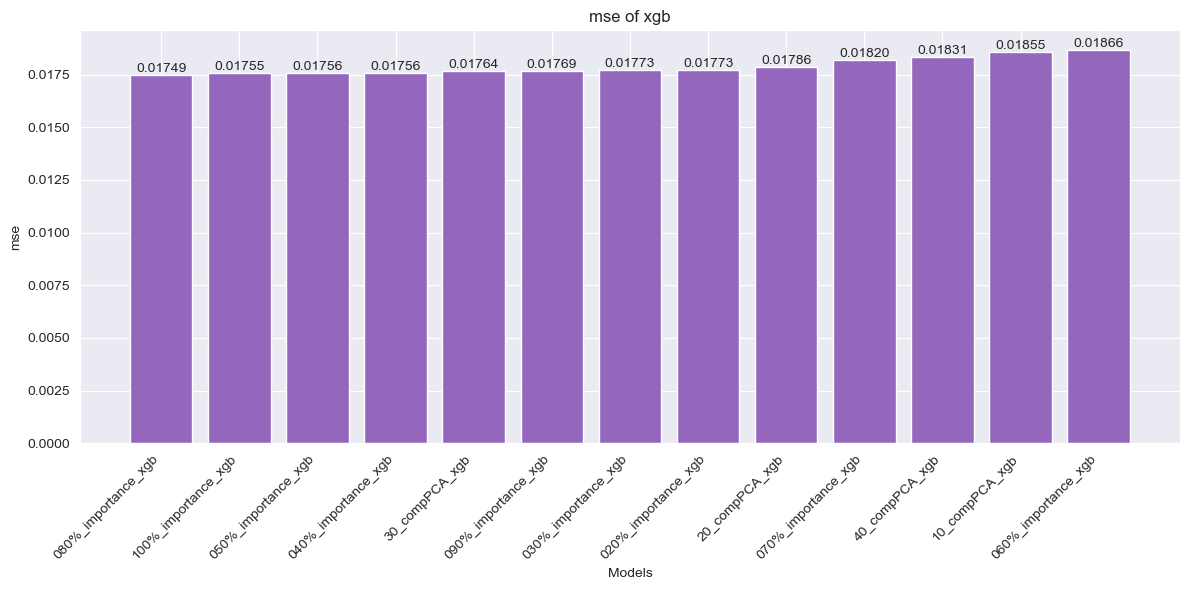

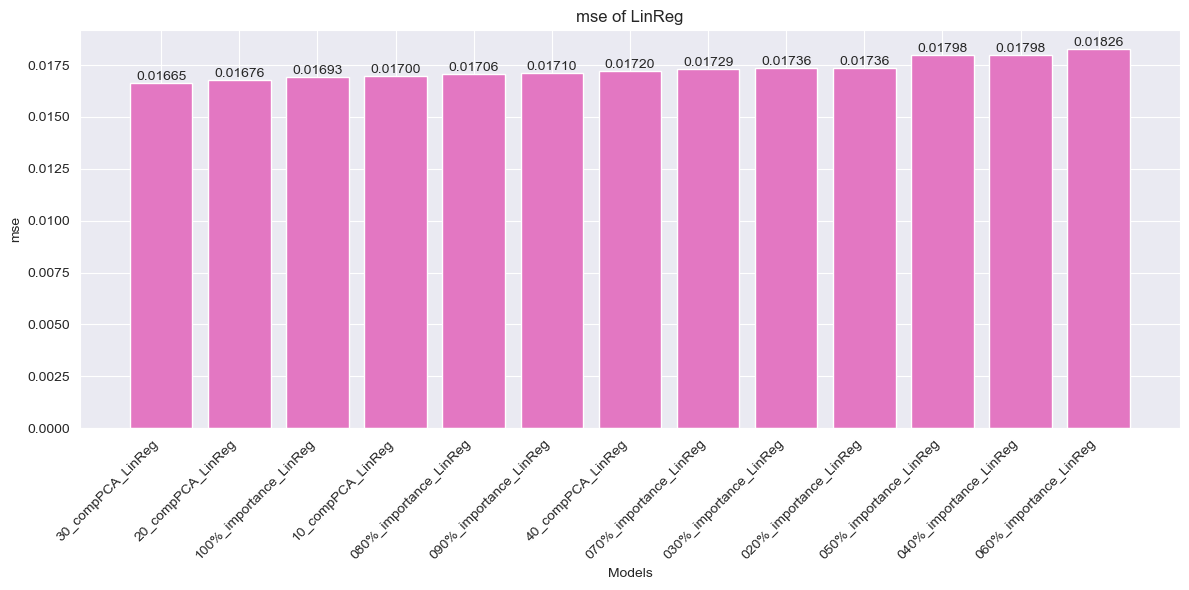

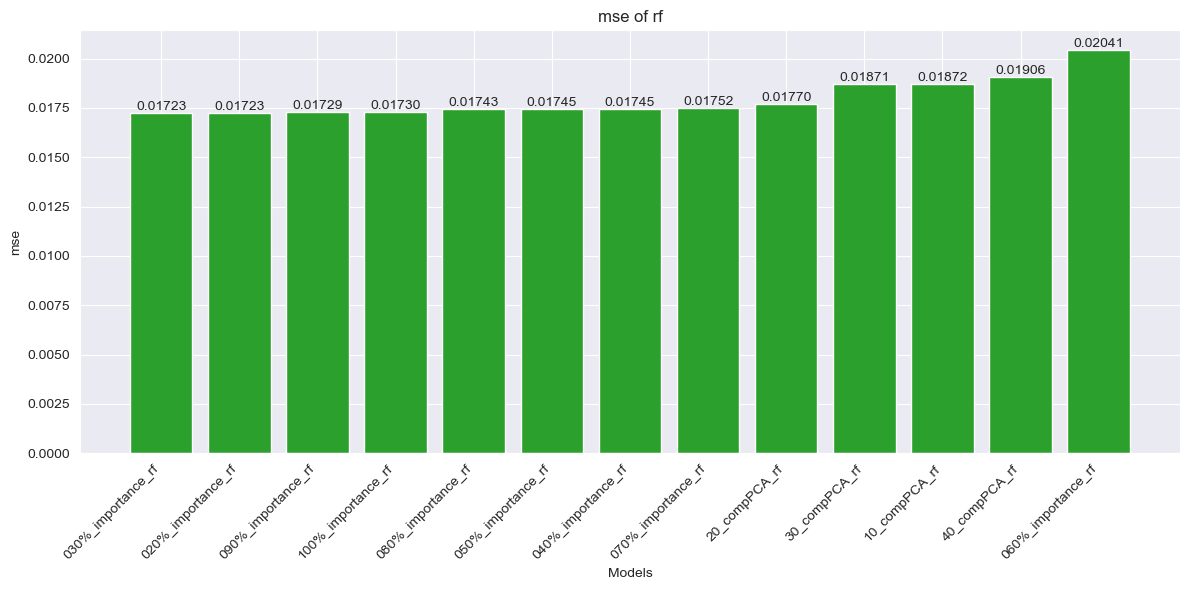

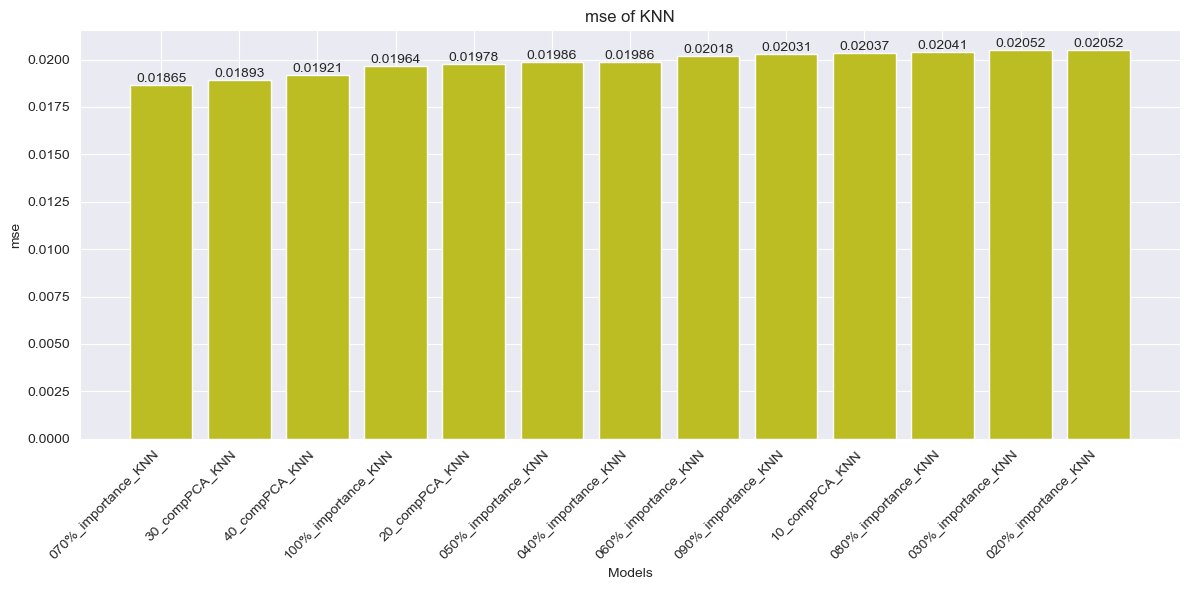

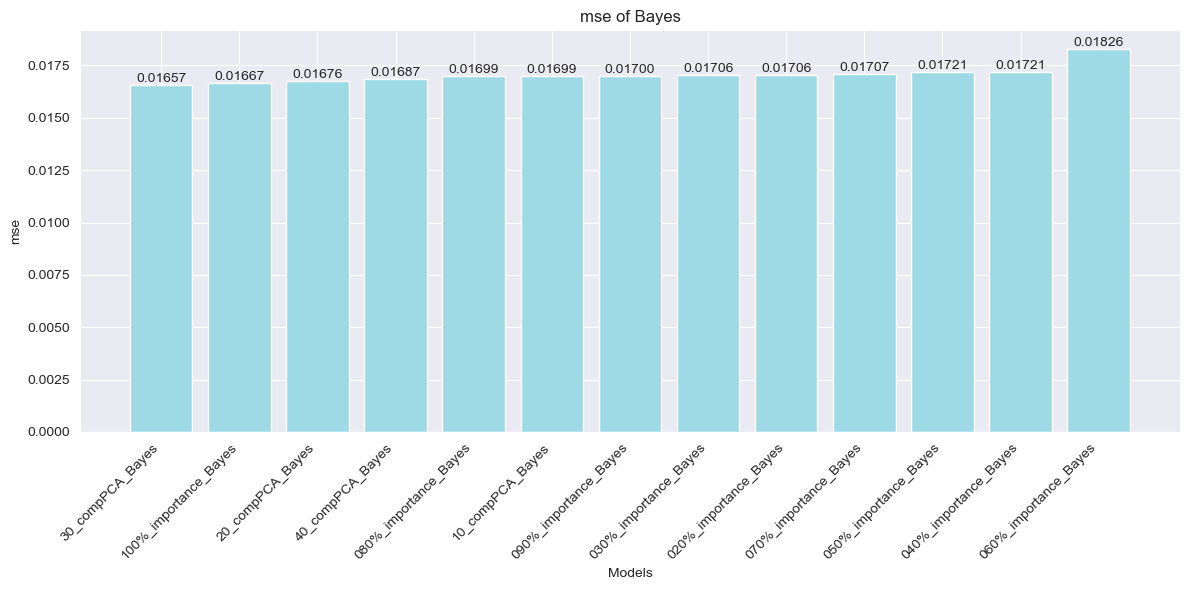

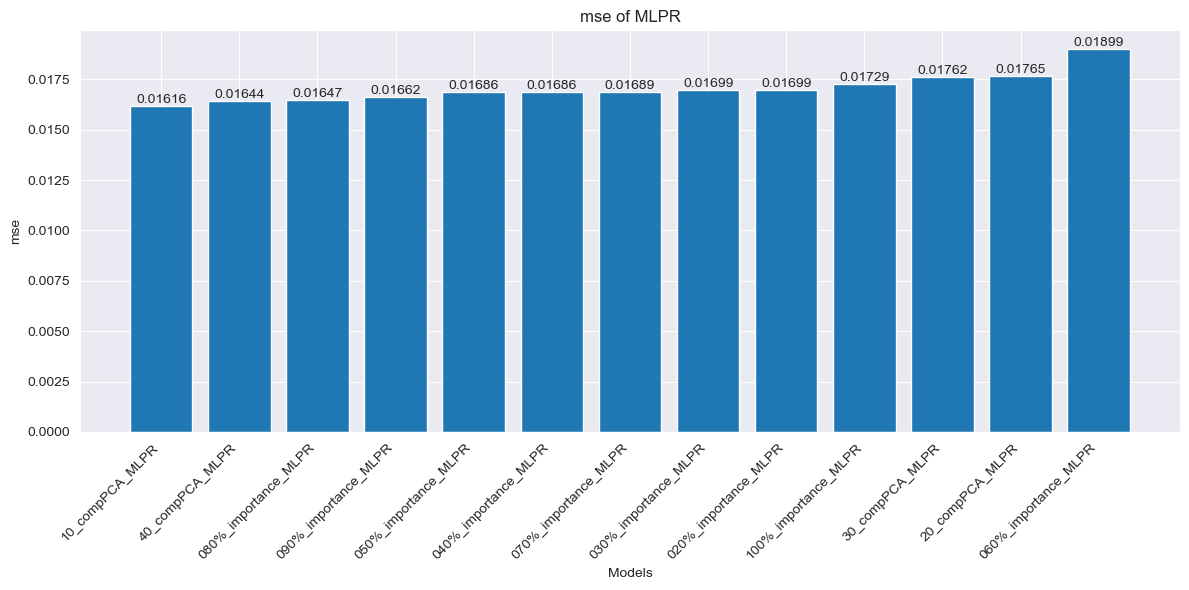

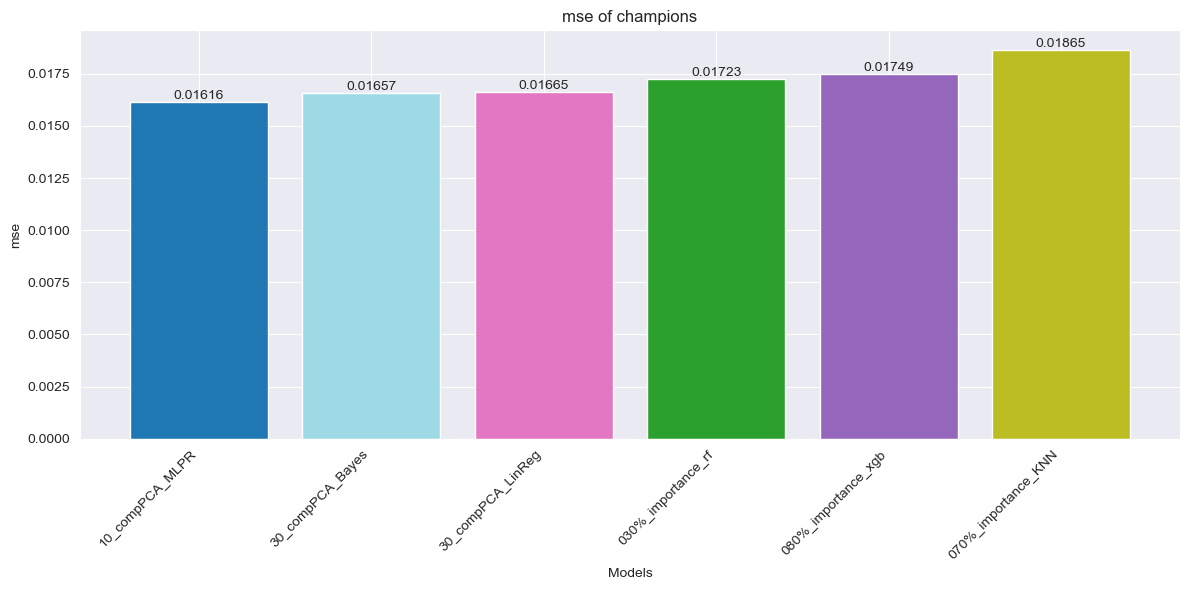

In [36]:
summarize_metric('mse', True)

### MAE

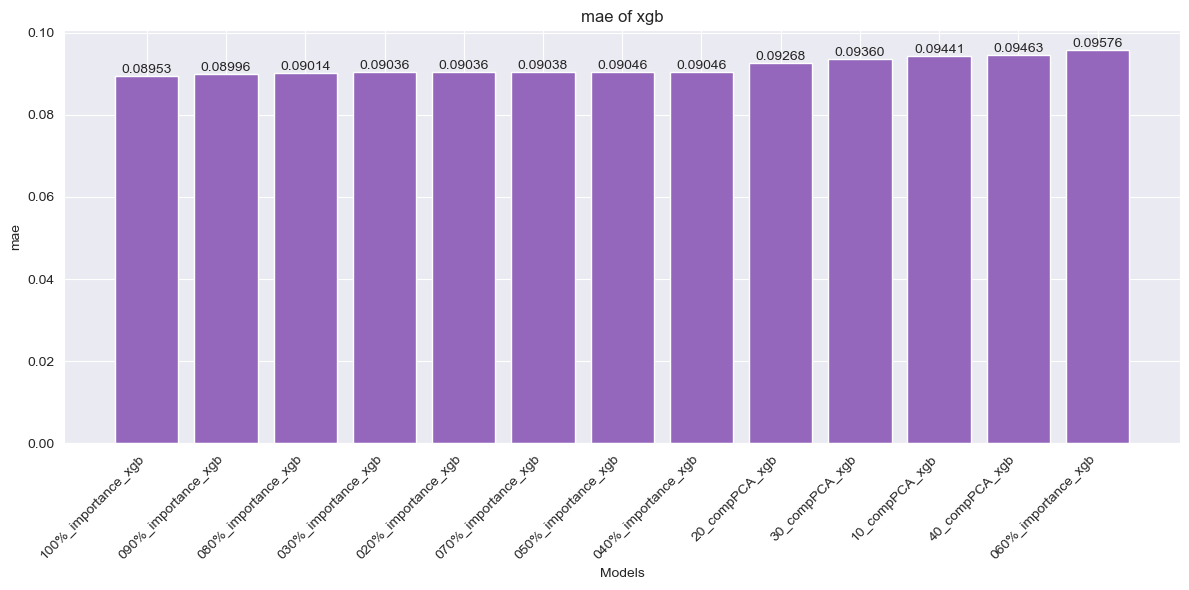

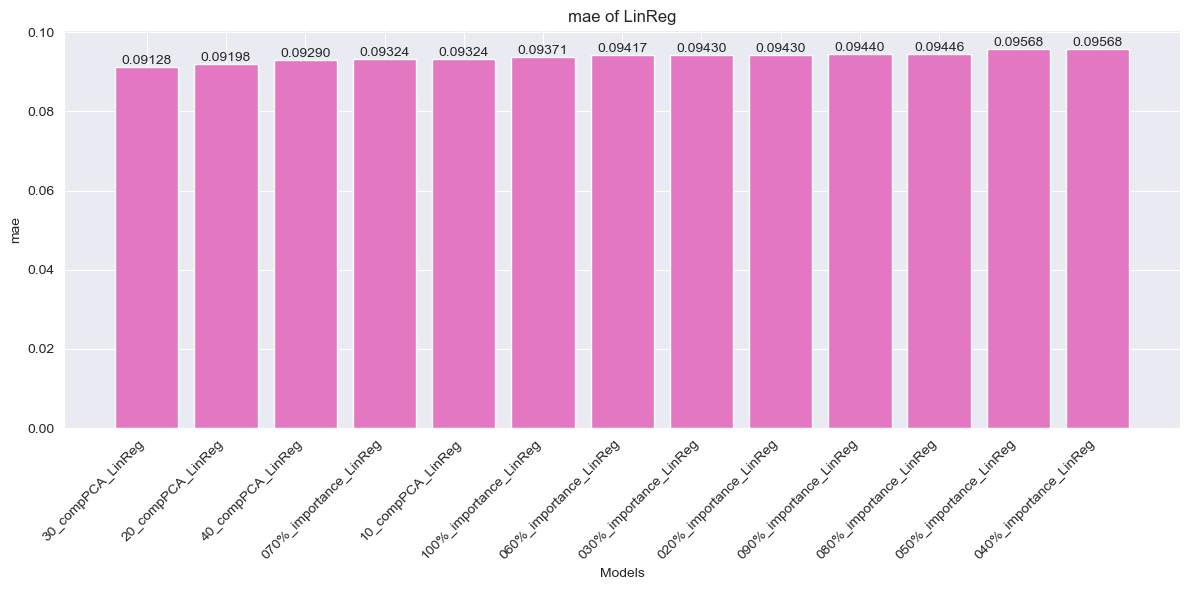

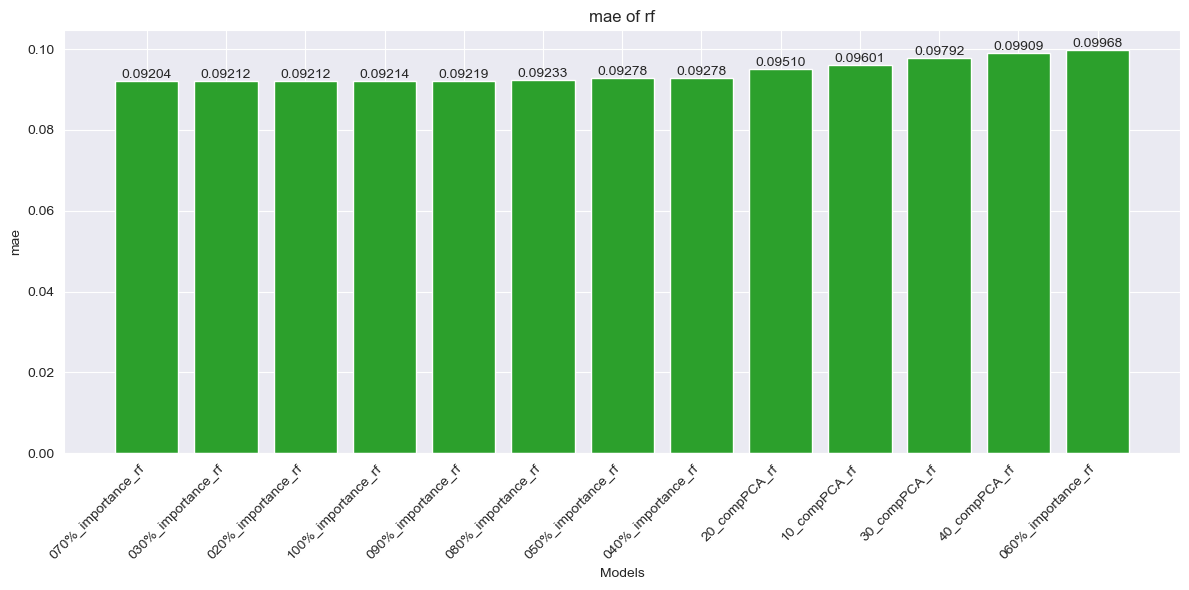

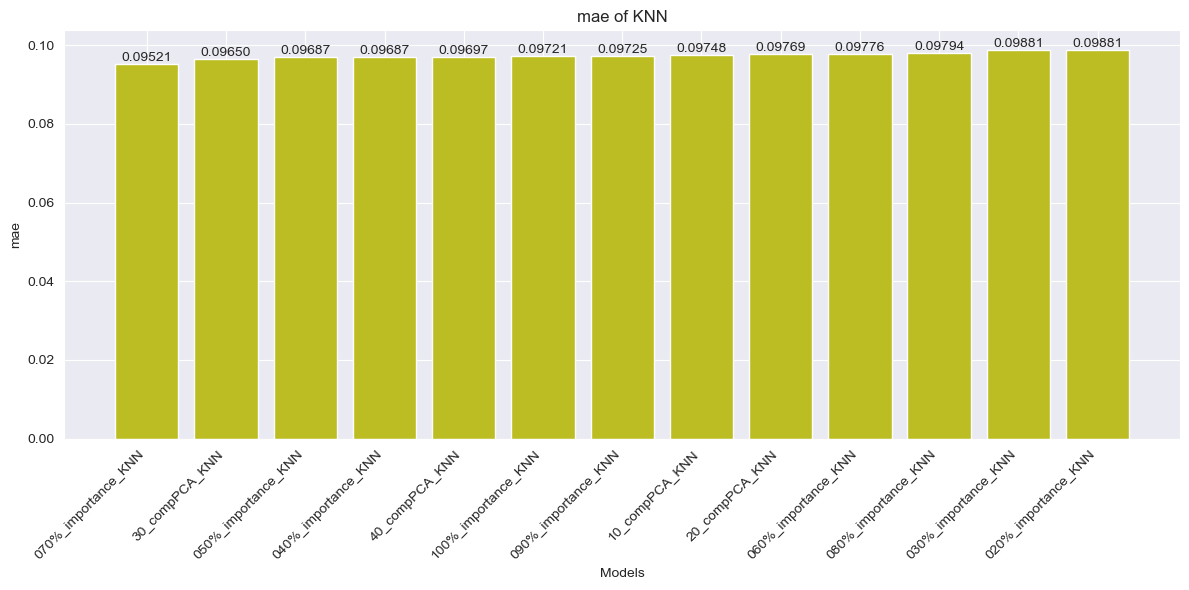

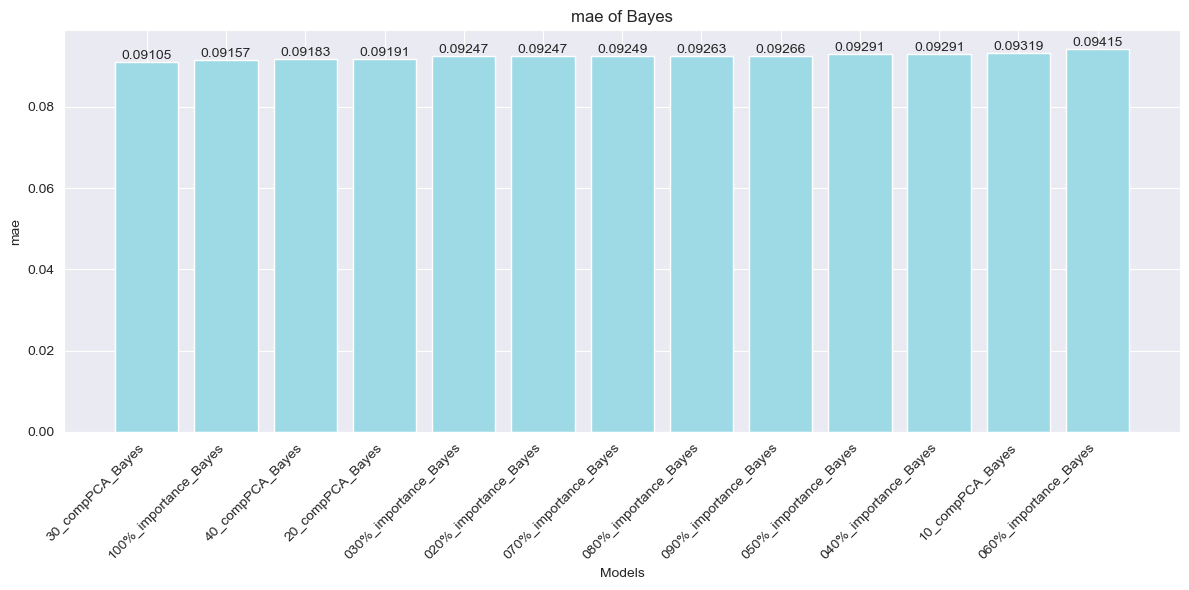

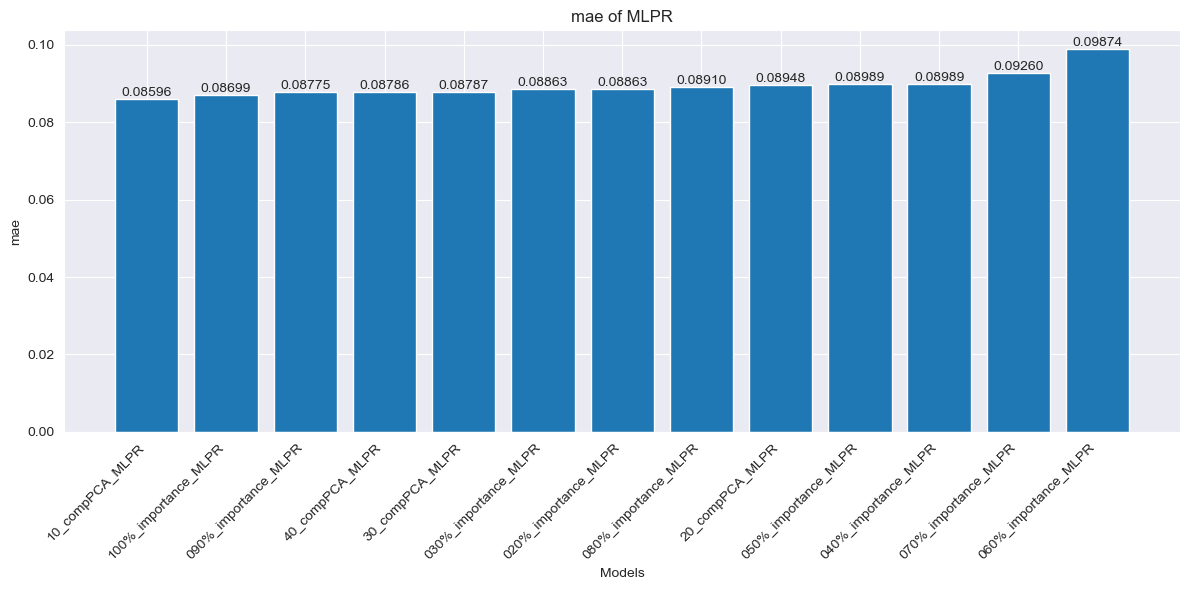

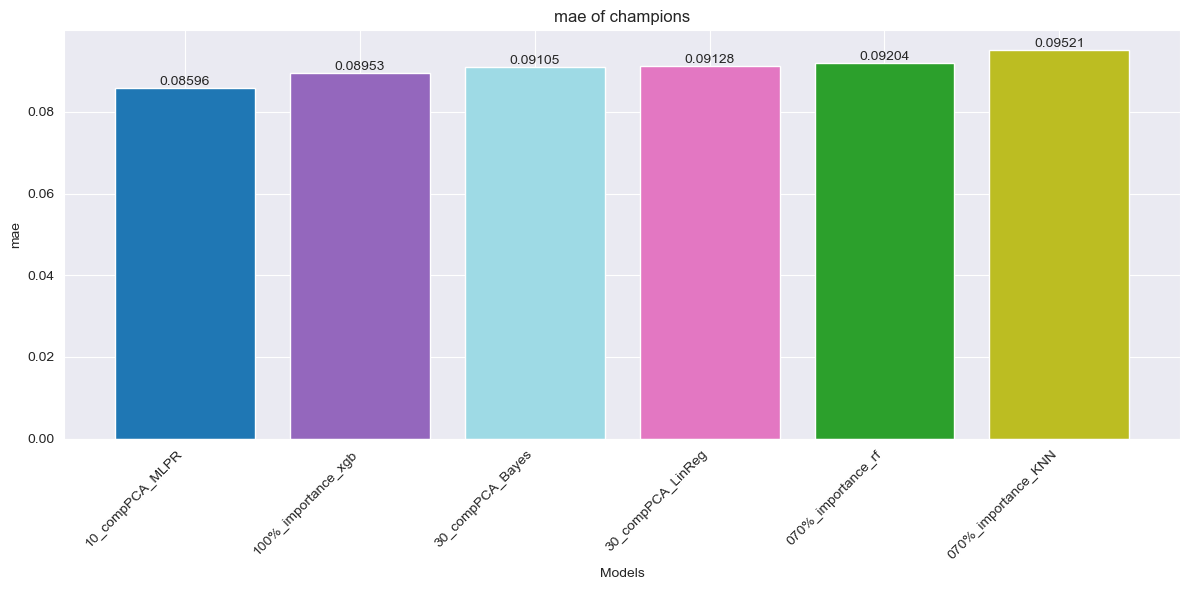

In [37]:
summarize_metric('mae', True)

### R2

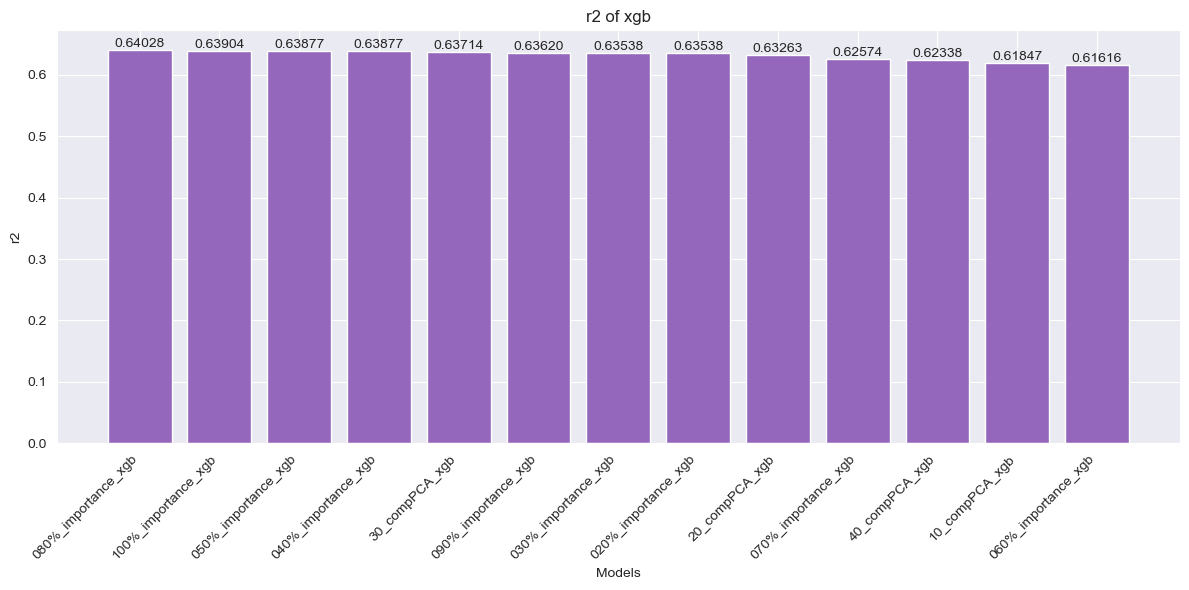

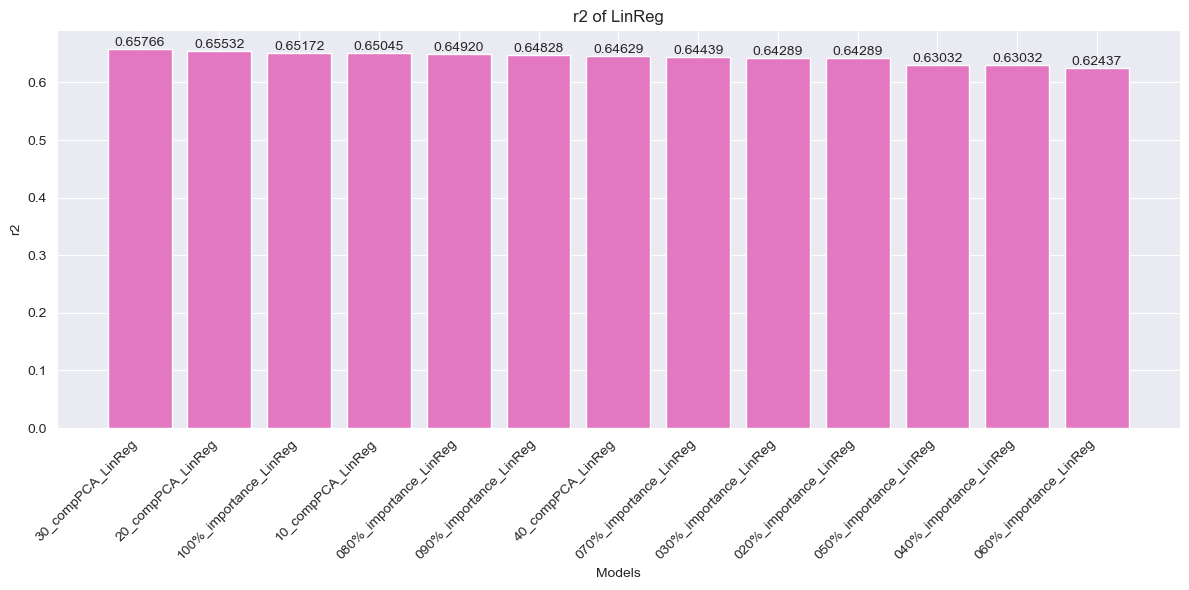

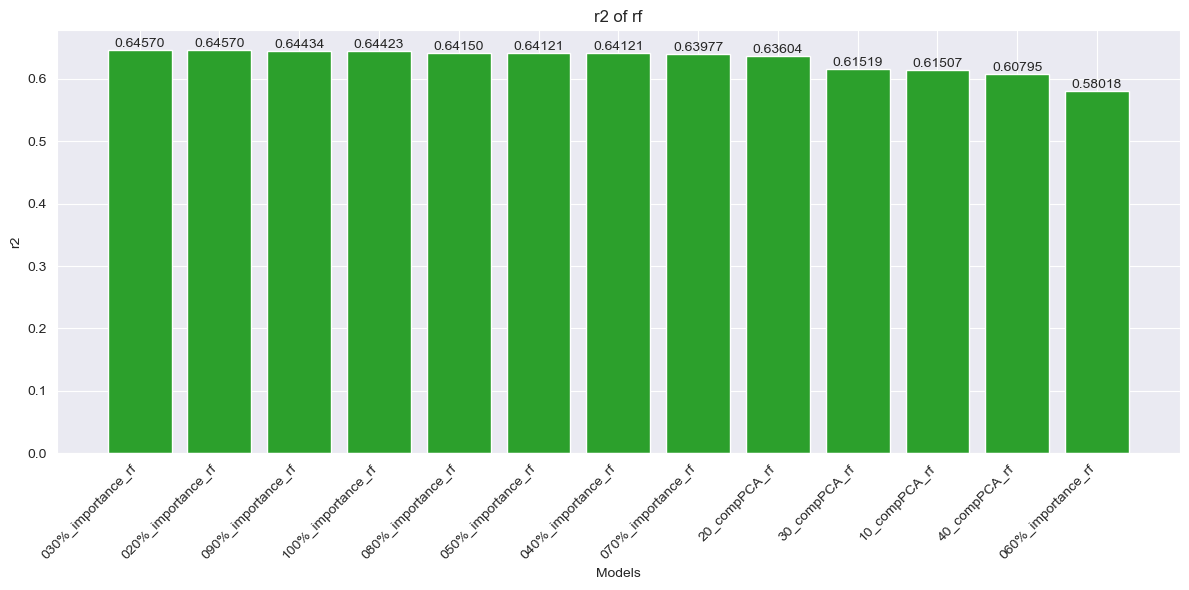

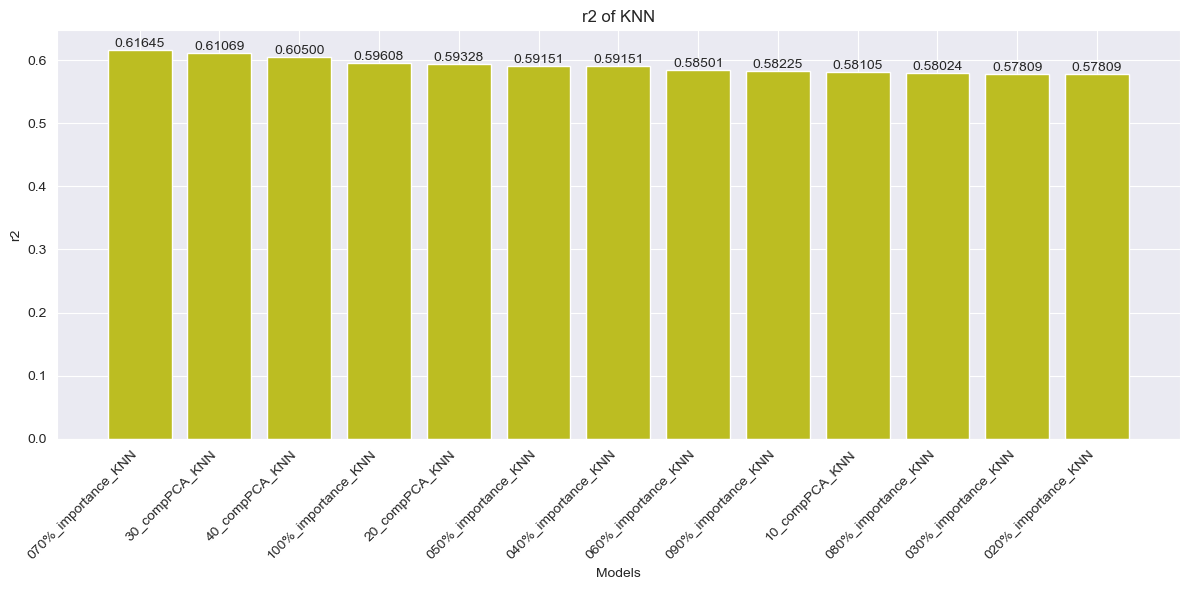

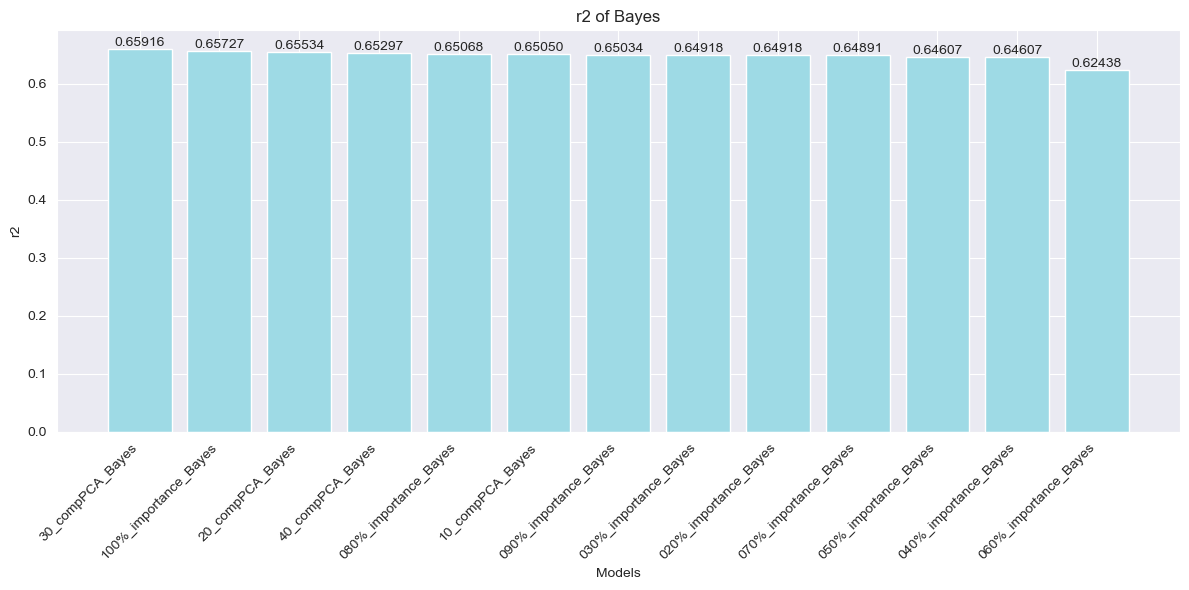

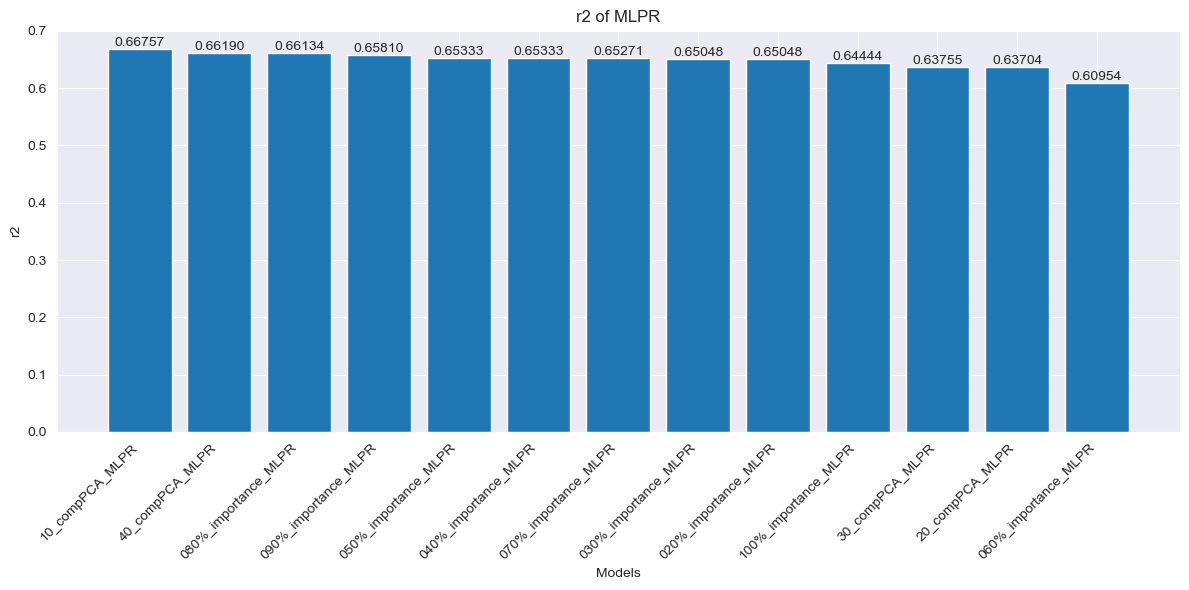

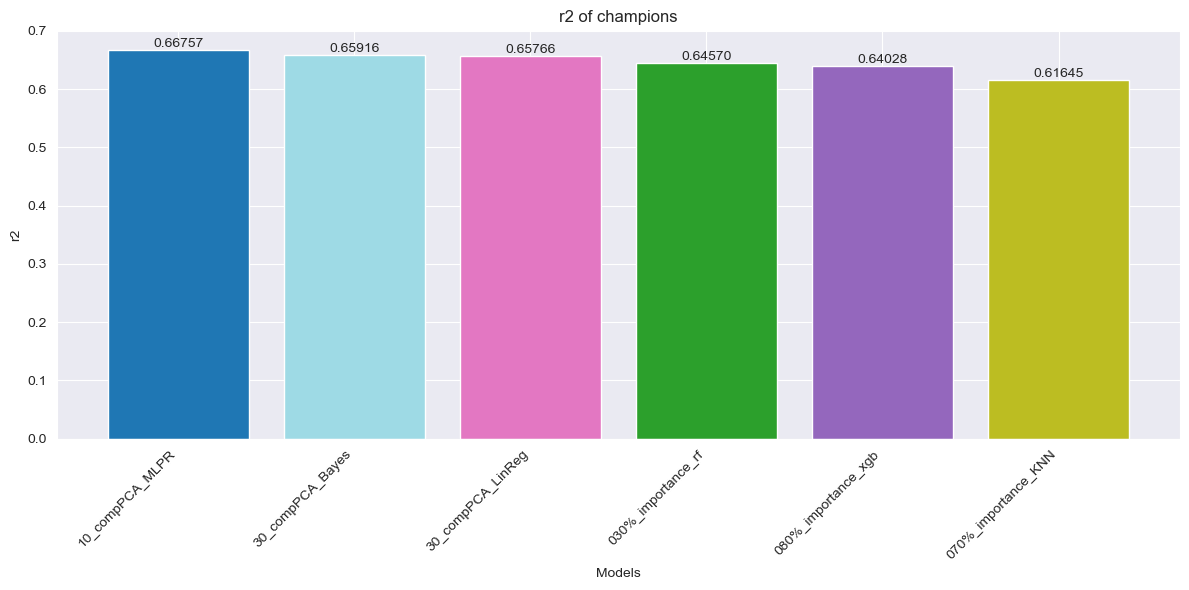

In [38]:
summarize_metric('r2', False)

### Time

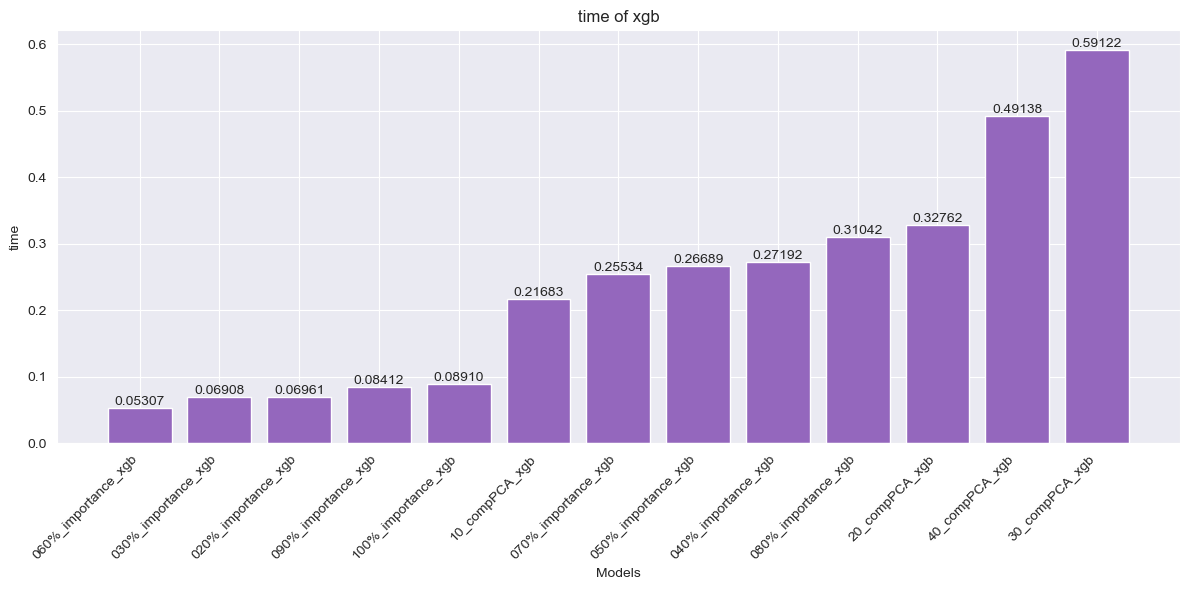

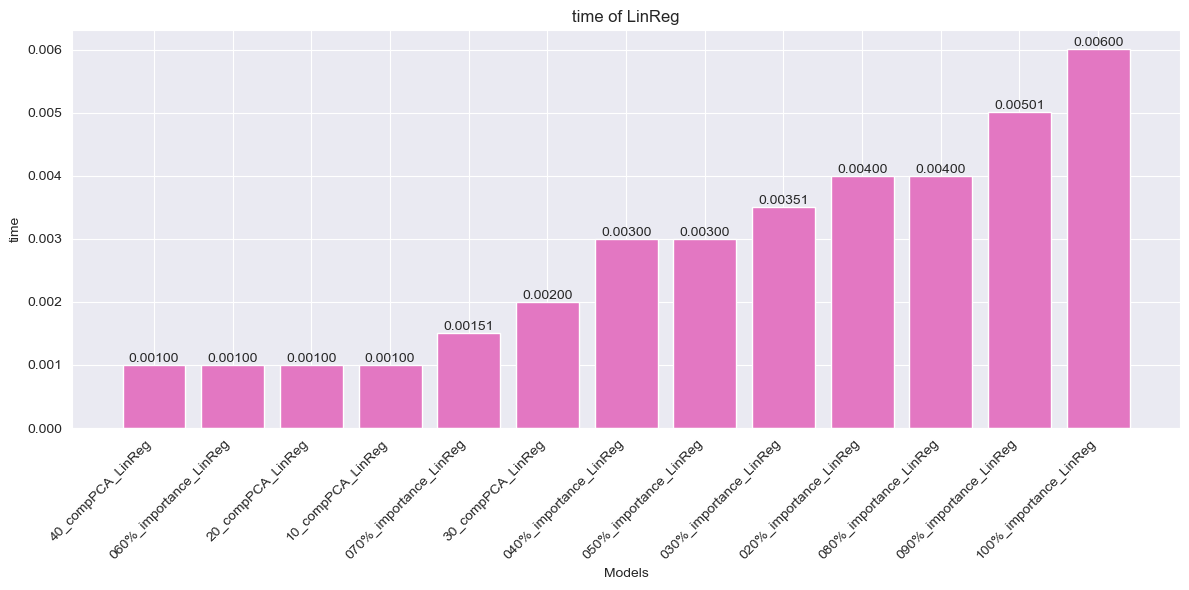

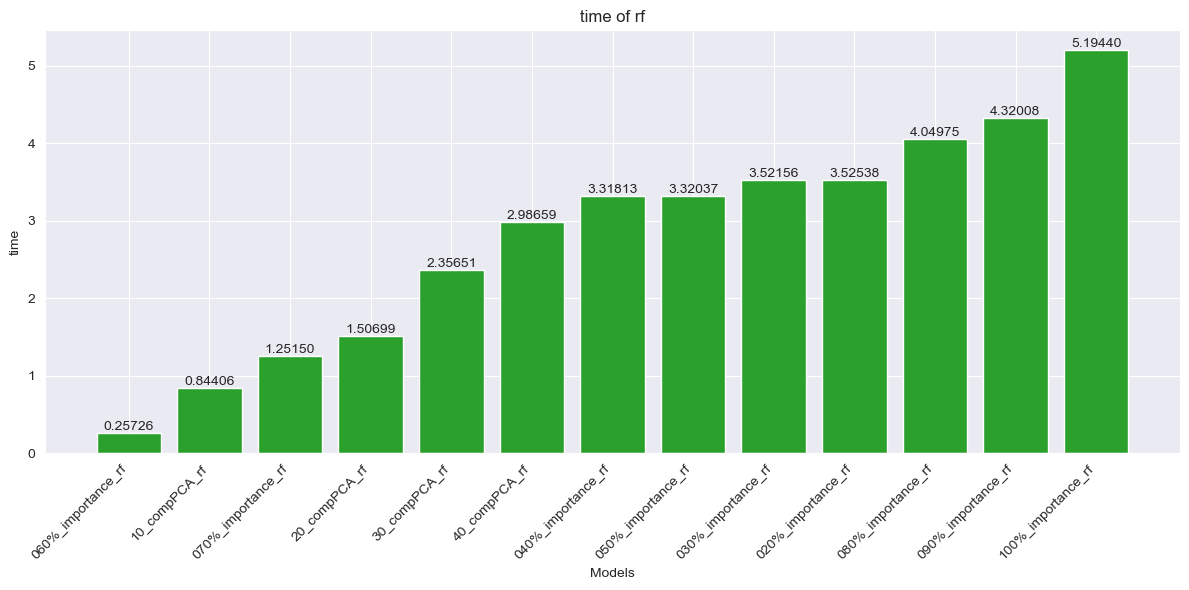

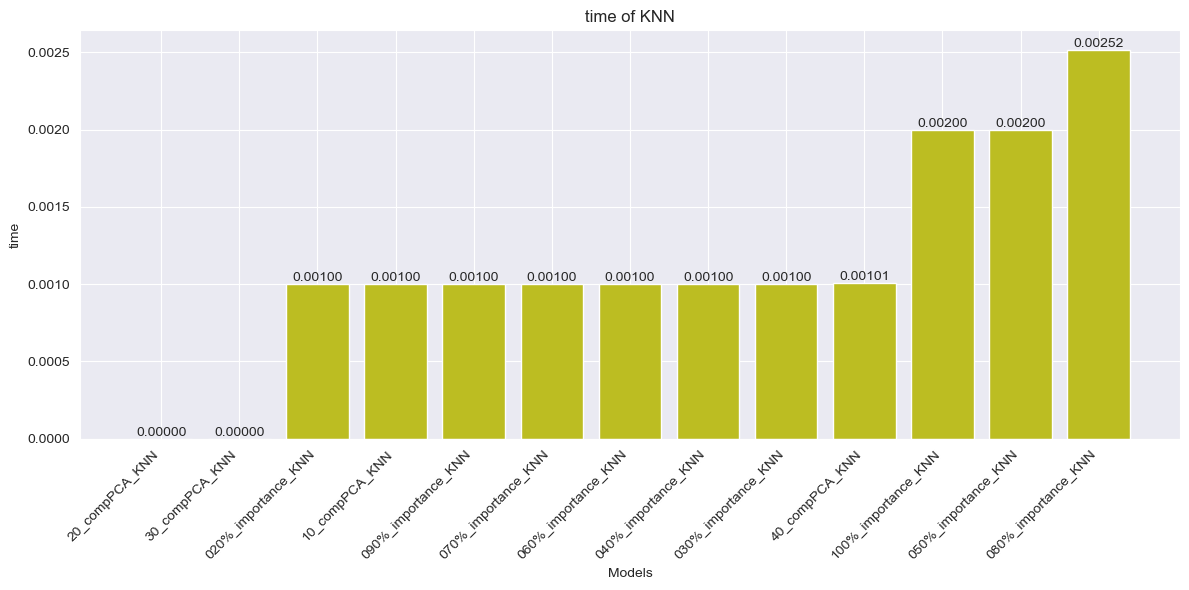

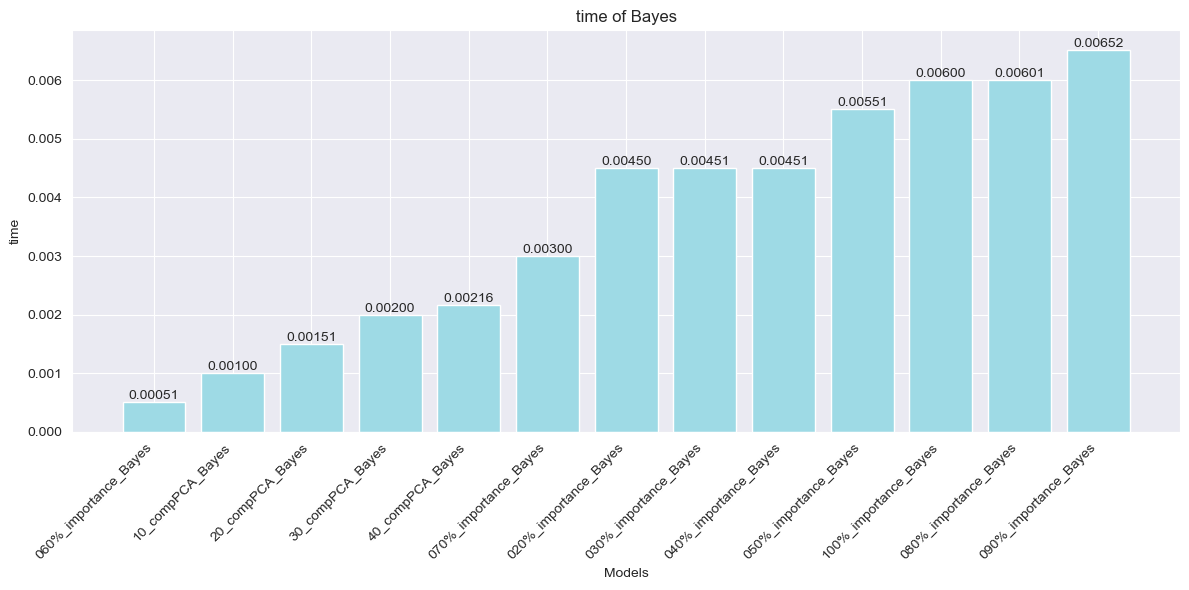

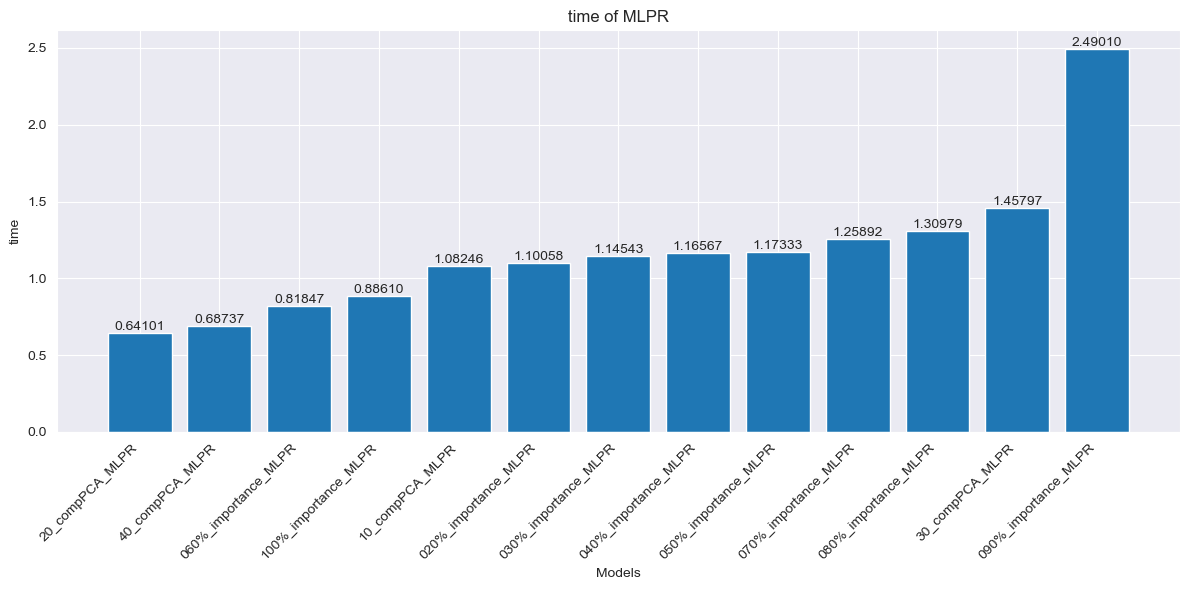

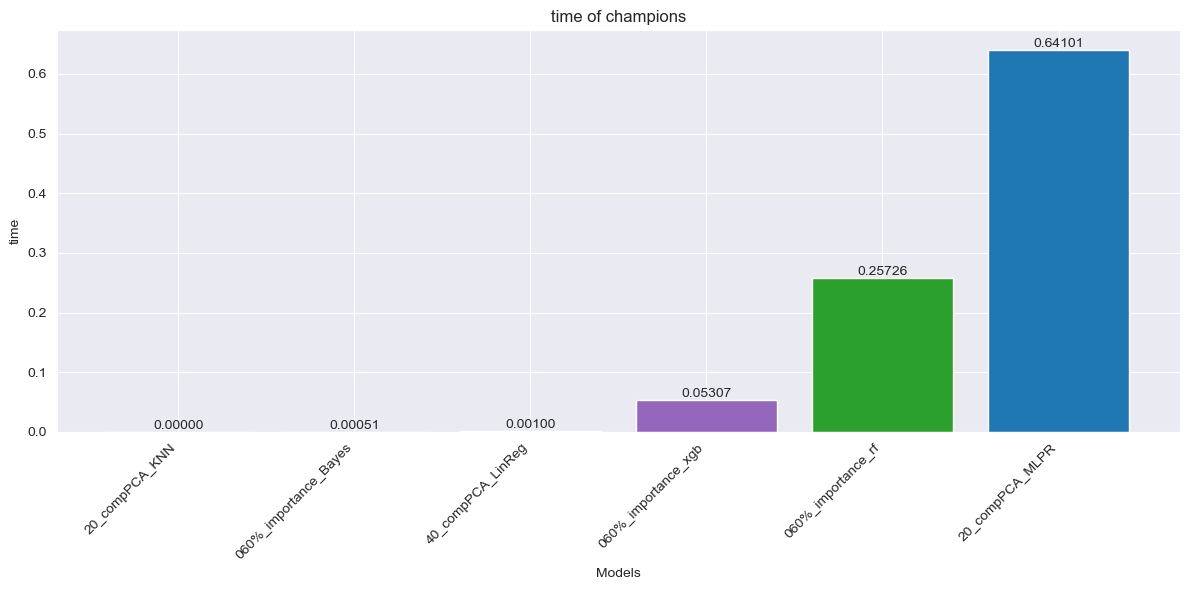

In [39]:
summarize_metric('time', True)

In [47]:
df_results[df_results["model_name"].isin(["10_compPCA_MLPR", "30_compPCA_Bayes", "30_compPCA_LinReg"])]

model_name       mae       mse        r2      time
59    10_compPCA_MLPR  0.085962  0.016164  0.667569  1.082461
67  30_compPCA_LinReg  0.091277  0.016646  0.657659  0.002002
70   30_compPCA_Bayes  0.091045  0.016573  0.659162  0.002000

## 6. Conclusion
Upon analyzing plots of different metrics among models, #1 model is consistently tuned MLPR for 10 component PCA dataset. It has the highest r^2, lowest MAE and MSE metrics among all the tested models.

Another model that performed consistently well, and appeared often on the "champions" plot is BayesRidge trained on 30 component PCA dataset.
30 component PCA Linear Regression proved relatively effective aswell, providing similar results.

In terms of computation times, MLPR, which had the best results, was the most time consuming.

Another thing i observed, is that PCA seems to work much better in case of MLPR, Bayes, KNN and LinearRegression, while importance performed better with xgboost and RandomForestRegressor.